In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv', sep = ',', header = None)
X = data.iloc[:,0:2] # read first two columns into X
y = data.iloc[:,2] # read the third column into y


In [3]:
data.columns = ['x1', 'x2', 'x3' , 'y']
data.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,65.0,0.049507,0.035391,0.007996,0.028812,0.042827,0.056725,0.22291
x2,65.0,111.395385,31.448427,0.000000,95.600000,109.100000,122.600000,199.30000
x3,65.0,303.581538,132.881441,87.800000,204.600000,290.700000,375.400000,775.90000
y,65.0,94.830923,7.300808,73.820000,91.420000,98.550000,100.000000,100.00000


In [4]:
m = len(y) # no. of training samples
m

65

In [5]:
data.head()

,x1,x2,x3,y
0,0.186214,97.1,97.2,73.82
1,0.043601,109.1,389.9,96.31
2,0.020247,112.8,202.5,100.00
3,0.079899,139.7,317.9,100.00
4,0.027489,104.2,269.2,100.00


In [6]:
def feature_normalize(X, mean=np.zeros(1), std=np.zeros(1)):
    X = np.array(X)
    if len(mean.shape) == 1 or len(std.shape) == 1:
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0, ddof=1)

    X = (X - mean)/std
    return X, mean, std

In [7]:
X_norm, mu, sigma = feature_normalize(data[['x1', 'x2','x3']])

In [8]:
data['x1_normalized'] = X_norm[:,0]
data['x2_normalized'] = X_norm[:,1]
data['x3_normalized'] = X_norm[:,2]
data[['x1_normalized', 'x2_normalized' , 'x3_normalized']].describe().T

,count,mean,std,min,25%,50%,75%,max
x1_normalized,65.0,1.631174e-16,1.0,-1.172934,-0.584744,-0.188760,0.203965,4.899674
x2_normalized,65.0,4.757146e-17,1.0,-3.542161,-0.502263,-0.072989,0.356285,2.795199
x3_normalized,65.0,-3.945562e-16,1.0,-1.623865,-0.744886,-0.096940,0.540470,3.554435


In [9]:
def compute_cost(X, y, theta):
    m = y.shape[0]
    h = X.dot(theta)
    J = (1/(2*m)) * ((h-y).T.dot(h-y))
    return J

In [10]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros(shape=(num_iters, 1))

    for i in range(0, num_iters):
        h = X.dot(theta)
        diff_hy = h - y

        delta = (1/m) * (diff_hy.T.dot(X))
        theta = theta - (alpha * delta.T)
        J_history[i] = compute_cost(X, y, theta)

    return theta, J_history

In [11]:
m = data.shape[0]
X = np.hstack((np.ones((m,1)),X_norm))
y = np.array(data.y.values).reshape(-1,1)
theta = np.zeros(shape=(X.shape[1],1))

In [12]:
alpha = [0.3, 0.1, 0.03, 0.01]
colors = ['b','r','g','c']
num_iters = 50

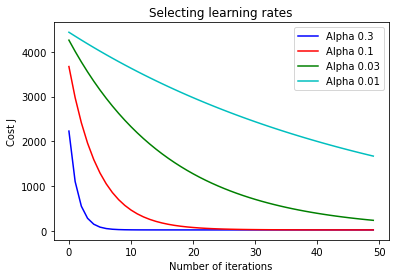

In [13]:
for i in range(0, len(alpha)):
    theta = np.zeros(shape=(X.shape[1],1))
    theta, J_history = gradient_descent(X, y, theta, alpha[i], num_iters)
    plt.plot(range(len(J_history)), J_history, colors[i], label='Alpha {}'.format(alpha[i]))
plt.xlabel('Number of iterations');
plt.ylabel('Cost J');
plt.title('Selecting learning rates');
plt.legend()
plt.show()

In [14]:
iterations = 250
alpha = 0.1
theta, _ = gradient_descent(X, y, theta, alpha, iterations)

print('Theta found by gradient descent:')
print(theta)

Theta found by gradient descent:
[[94.83092308]
 [-1.18346712]
 [ 0.41467336]
 [ 0.56342545]]


In [15]:
x1 = (0.057768924 - mu[0])/sigma[0]
x2 = (86.3 - mu[1])/sigma[1]
x3 = (100.4 - mu[2])/sigma[2]
y_pred = theta[0] + theta[1]*x1 + theta[2]*x2 + theta[3]*x3 
f'Relative volume of organ receiving dose of 900: {y_pred[0]}'

'Relative volume of organ receiving dose of 900: 93.36223663941259'

In [16]:
data_test = pd.read_csv('Test_data.csv', sep = ',', header = None)
X_new = data_test.iloc[:,0:2] # read first two columns into X X_new = data_test(:, 1:3)


In [17]:
data_test.head()

,0,1,2
0,0.057769,86.3,100.4
1,0.059804,134.3,234.1
2,0.039129,93.0,247.9
3,0.050830,111.1,198.7
4,0.038040,141.2,328.6


In [18]:
data_test.columns = ['x1', 'x2', 'x3' ]
data_test.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,10.0,0.055504,0.018941,0.036264,0.039916,0.0543,0.060362,0.096964
x2,10.0,112.420000,25.885165,86.300000,90.075000,102.1500,134.000000,154.300000
x3,10.0,227.480000,122.352204,89.900000,126.250000,221.1000,266.725000,492.000000


In [19]:
data_test.head()

,x1,x2,x3
0,0.057769,86.3,100.4
1,0.059804,134.3,234.1
2,0.039129,93.0,247.9
3,0.050830,111.1,198.7
4,0.038040,141.2,328.6


In [20]:
X_new = data_test

In [30]:
X_nn = (X_new - np.mean(X_new))/np.std(X_new)

In [28]:
X_nn

,x1,x2,x3
0,0.126055,-1.063655,-1.094824
1,0.239281,0.890995,0.057033
2,-0.911292,-0.790819,0.175923
3,-0.260081,-0.053753,-0.247946
4,-0.971869,1.171976,0.871172
5,-0.736118,1.705432,2.278901
6,0.280702,0.842128,-0.166963
7,0.996768,-0.969995,-1.185284
8,-1.070729,-0.949634,0.392165
9,2.307284,-0.782675,-1.080178


In [47]:
n,m = X_nn.shape # for generality
X0 = np.ones((n,1))
Xnew = np.hstack((X0,X_nn))


In [48]:
Xnew

array([[ 1.        ,  0.12605452, -1.06365547, -1.09482361],
       [ 1.        ,  0.23928074,  0.8909947 ,  0.05703283],
       [ 1.        , -0.91129244, -0.79081888,  0.17592303],
       [ 1.        , -0.26008094, -0.05375288, -0.24794636],
       [ 1.        , -0.97186909,  1.17197566,  0.8711722 ],
       [ 1.        , -0.73611765,  1.70543227,  2.27890102],
       [ 1.        ,  0.28070234,  0.84212845, -0.16696319],
       [ 1.        ,  0.99676799, -0.96999515, -1.18528354],
       [ 1.        , -1.07072931, -0.94963421,  0.39216534],
       [ 1.        ,  2.30728385, -0.78267451, -1.08017772]])

In [50]:
y_new = np.dot(Xnew,theta)

In [51]:
y_new

array([[93.62382063],
       [94.9493477 ],
       [95.6805957 ],
       [94.97673115],
       [96.95792587],
       [97.69328228],
       [94.75385801],
       [92.58123088],
       [95.92526393],
       [91.16717462]])